<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/6_5_one_class_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

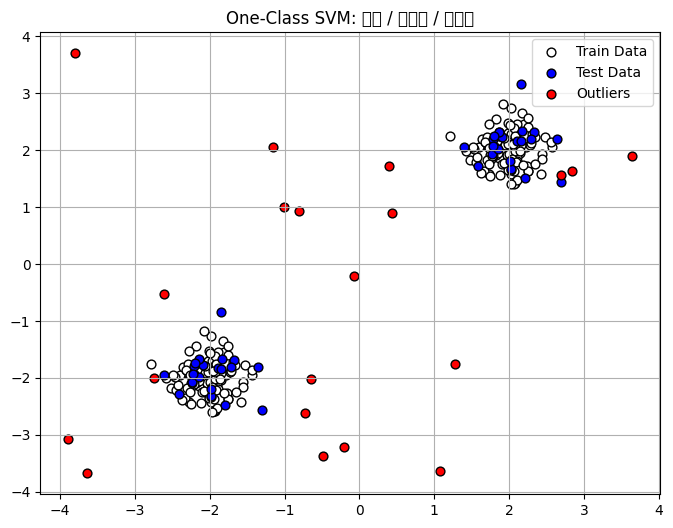

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# 1. 정상(normal) 데이터 생성
np.random.seed(42)
X_train = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X_train + 2, X_train - 2]  # 두 개의 중심으로 분포
"""
X_train은 이제 두 개의 군집(cluster) 으로 구성된 200개의 샘플을 가지게 됩니다.
하나는 원래 데이터보다 오른쪽 위로 이동한 군집 (+2)
다른 하나는 왼쪽 아래로 이동한 군집 (-2)
"""

# 2. 테스트 데이터 (정상 + 이상치)
X_test = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X_test + 2, X_test - 2]

X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))  # 이상치

# 3. One-Class SVM 모델 학습
"""
파라미터 설명:
kernel="rbf"
→ RBF 커널 (Radial Basis Function) 을 사용합니다.
→ 데이터를 고차원으로 매핑해서 더 복잡한 경계를 만들 수 있음 (비선형 분포에 효과적).

gamma=0.1
→ RBF 커널의 감도(sensitivity) 를 조절하는 하이퍼파라미터입니다.
→ 값이 작으면 부드러운 경계, 값이 크면 더 세밀하게 데이터를 감싸는 경계를 만듭니다.

nu=0.05
→ 이상치의 비율을 지정합니다.
→ 전체 데이터 중에서 약 5% 정도는 이상치라고 판단하도록 설정하는 역할입니다.
→ 또한 학습 시 허용하는 오차의 비율도 의미합니다.
"""

clf = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.1)
clf.fit(X_train)

# 4. 예측
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# 5. 시각화 (등고선 없이!)
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolors='k', s=40, label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', edgecolors='k', s=40, label='Test Data')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', edgecolors='k', s=40, label='Outliers')
plt.title("One-Class SVM: 정상 / 테스트 / 이상치")
plt.legend()
plt.grid(True)
plt.show()
